In [7]:
from sklearn import tree
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

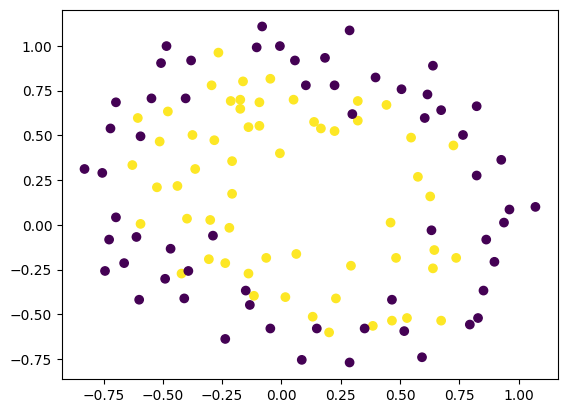

In [23]:
# 载入数据
data = np.genfromtxt("LR-testSet2.txt", delimiter=",")
x_data = data[:, : -1]
y_data = data[:, -1]

plt.scatter(x_data[:,0], x_data[:,1], c=y_data)
plt.show()

In [24]:
# 分割数据
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data) # 1/4 test

# 非线性 要剪枝
# max_depth 树的深度， 4 太简单了，大概为7-10
# min_samples_split 内部节点再划分所需的最小样本数
model = tree.DecisionTreeClassifier(max_depth = 7, min_samples_split = 4)

model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=7, min_samples_split=4)

In [ ]:
# 画决策树图
import graphviz

dot_data = tree.export_graphviz(model, out_file = None, feature_names = ['x', 'y'], 
                                class_names = ['label0', 'label1'], filled = True, rounded = True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('dtree-cart')
graph

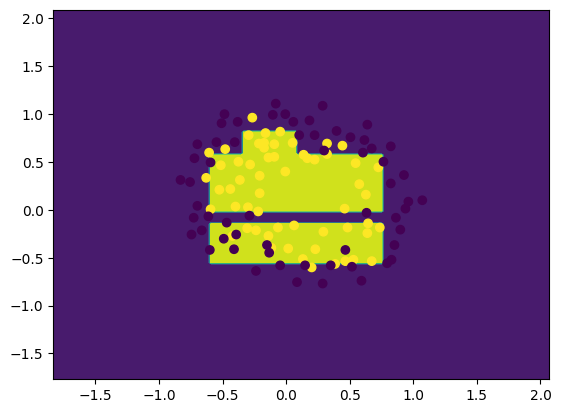

In [25]:
x_min, x_max = x_data[:, 0].min() - 1 , x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1 , x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# np.r_按row行来组合array,一行叠在一行后面，变成一个很长的一行
z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel和flatten类似，多维数据转一维，却会改变原始数据，最后变成[x,y],再进行预测
z = z.reshape(xx.shape)

cs = plt.contourf(xx, yy, z)

plt.scatter(x_data[:, 0], x_data[:, 1], c = y_data)
plt.show()

In [26]:
predictions = model.predict(x_train)
print(classification_report(predictions, y_train))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95        44
         1.0       0.98      0.91      0.94        44

    accuracy                           0.94        88
   macro avg       0.95      0.94      0.94        88
weighted avg       0.95      0.94      0.94        88



In [27]:
predictions = model.predict(x_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

         0.0       0.77      0.56      0.65        18
         1.0       0.53      0.75      0.62        12

    accuracy                           0.63        30
   macro avg       0.65      0.65      0.63        30
weighted avg       0.67      0.63      0.64        30

